### 【AIコース】教師なし学習課題

##### 課題の流れ
・導入  
・データ取得  
・機能のスケーリング  
・特徴抽出  
・クラスタリング  
・クラスタを見る  

#### 1. 【課題】教師なし学習とは何か記述せよ
##### ・教師あり学習との比較  
答え:   
教師あり学習は、予測の対象となる入力データと教師となる出力データをアルゴリズムに与え、アルゴリズムは入力から望ましい出力をするように学習する。  
一方、教師なし学習は、予測の対象となる入力データのみアルゴリズムに与え、アルゴリズムは入力データから望ましい出力をするように学習する。  
教師あり学習に比べ、教師なし学習の方が、理解するのも評価するのも難しい。  
##### ・どんなときに使うのか  
答え:  
出力すべき内容、つまり答えがわかっておらず、入力データから答えを導き出したいときや、入力データを分類したり新たな特徴量を抽出したりしたい時、あるいは不要な特徴量を削除する次元削減をする時などに使う。  
##### ・具体的にどんなものがあるのか  
答え:  
- クラスタリング  
  ① k-means [非階層的手法]  
      中心点を任意にk個選び、そこを起点に特徴量をk個に分類する手法  
  ② 完全連結法 [階層的手法 - 凝集型]  
      距離の近いクラスタ同士を順次繋げる手法　　
- Feature Selection(特徴選択)  
  ① Filter Method(フィルター法)ß
      特徴量をその重要度を考慮して選び出す手法
  ② Wrapper Method(ラッパー法)  
      モデルを学習させてその性能を評価指標とする手法  
  ③ Embedded Method(埋め込み法)  
      学習時に特徴選択を行うモデルを使い特徴選択のみ行う手法  
- Feature Extraction(特徴抽出)  
  ① PCA(主成分分析)  
      相関のある複数の特徴量同士を一つの特徴量にまとめ特徴量の個数を減らす手法

#### 2. 【課題】必要なライブラリをimport

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

#### 3. 【課題】csvファイルの読み込み

In [2]:
# webサイトから直接ファイルをダウンロードする際は、ファイル名までクリックしてファイルを開いた形にして、そのURLを指定する
# 「header = None」を指定しまうと、元のデータのヘッダを使わず、数字が採番されてしまうため、ヘッダを使いたいときは、「header = None」は指定しない
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")

In [3]:
print("サンプルの数:{}　特徴量の数:{}\n".format(*data.shape))
print("特徴量の型\n", data.dtypes, "\n")
print("統計量の要約")
display(data.describe())
display(data.head())
display(data.count())

サンプルの数:440　特徴量の数:8

特徴量の型
 Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object 

統計量の要約


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Channel             440
Region              440
Fresh               440
Milk                440
Grocery             440
Frozen              440
Detergents_Paper    440
Delicassen          440
dtype: int64

#### 4. 【課題】不要な特徴量を消す

In [4]:
# 元のデータはdata_originalに格納しておく
data_original = data.copy()

# dataからChannelとRegionの2列を削除するコードを記述
data = data.drop(["Channel", "Region"], axis = 1)

# 対象の2列が削除されていることの確認
display(data.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


#### ※scatter matrixを描く
scatter_matrixは多変量のデータを確認したい時に役立つ　

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b384f28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10c4b73c8>]], dtype=object)

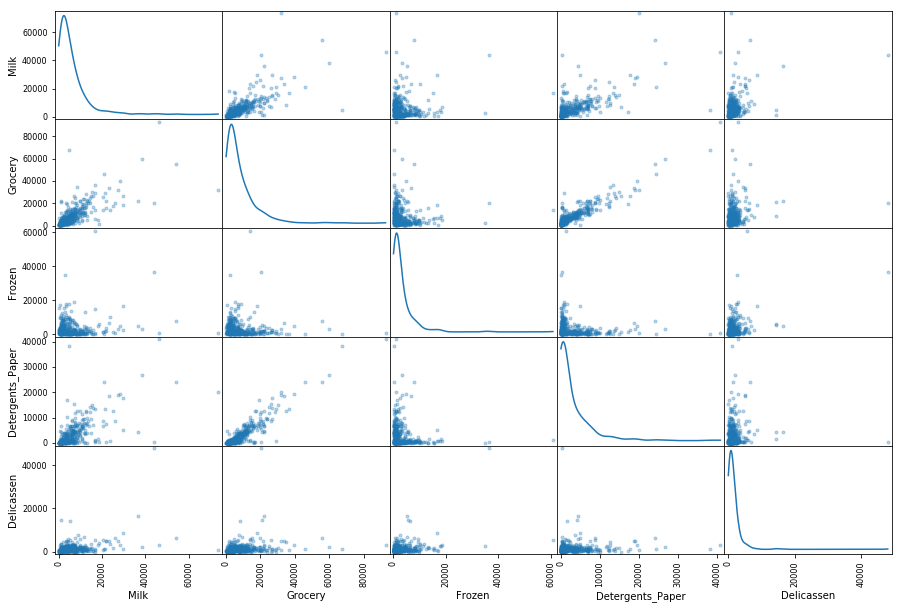

In [5]:
# data_fsがX_trainとX_test用のため、比較用のdataもX_trainとX_test分に絞る。(data.iloc[:, 1:])
pd.scatter_matrix(data.iloc[:, 1:], alpha = 0.3, figsize = (15, 10), diagonal = "kde")

#### 5. 【課題】Feature Scalingの実行

In [6]:
# y_trainとy_testはScalingさせないように事前に分割しておき、data_fsをX_trainとX_testにする
data_fs = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
data_fs = np.log(data)

#### 6. 【課題】なぜFeature Scalingが必要なのか記述せよ
答え:  
特徴量間で特徴量の取り得る値である「スケール」が異なるとモデルをうまく学習させることができないことがあるため。  
線形モデルや、特にサポートベクタという決定境界と特徴量の距離により学習するモデルであるサポートベクタマシンを利用する場合、Feature Scalingは必須となる。  
scatter_matrixでみてもScalingする前は、値の範囲の最大値が40,000であったり、100,000であったりと統一が取れていなかったが、Scaling後には、最大値がほぼ12〜13の間に収まり、特徴量間の範囲が統一化されている。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e74ccf8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f63de48>]], dtype=object)

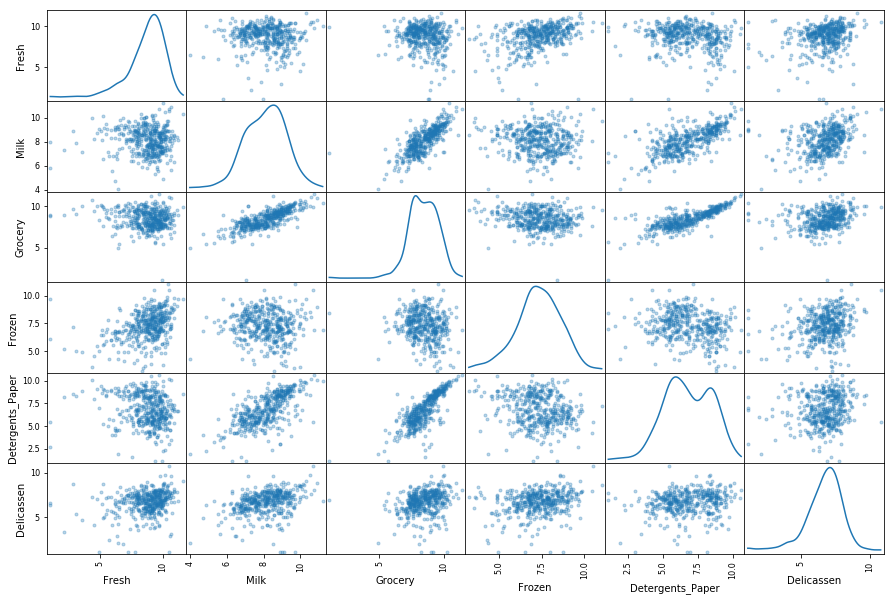

In [7]:
pd.scatter_matrix(data_fs, alpha = 0.3, figsize = (15, 10), diagonal = "kde")

#### 7. 【課題】PCAの実行

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# le = LabelEncoder()
# data_fs_enc = le.fit_transform(data_fs)

X = data_fs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)

acc_train = accuracy_score(y_train, lr.predict(X_train))
acc = accuracy_score(y_test, lr.predict(X_test))
acc_pca_train = accuracy_score(y_train, lr_pca.predict(X_train_pca))
acc_pca = accuracy_score(y_test, lr_pca.predict(X_test_pca))
print(acc_train, acc_pca_train)
print(acc, acc_pca)

0.324675324675 0.0292207792208
0.0 0.0


In [10]:
pca_evr = PCA(n_components = None)
X_train_pca = pca_evr.fit_transform(X_train)
var_exp = pca_evr.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print("Each Variance Ratio:  ", var_exp)
print("Total Variance Ratio: ", cum_var_exp)

Each Variance Ratio:   [ 0.42286629  0.27810055  0.12784283  0.10445875  0.0456934   0.02103818]
Total Variance Ratio:  [ 0.42286629  0.70096683  0.82880966  0.93326841  0.97896182  1.        ]


In [11]:
# 二つ目の主成分までで70%を超える
data_pca = var_exp[0:2]
print(data_pca)

[ 0.42286629  0.27810055]


#### 8. 【課題】なぜPCAを行うのか記述せよ

答え:  
PCAを行い次元数を減らすことにより、データの可視化が容易になること、データが圧縮され計算に掛かる時間やリソースを削減できること、次元数の多さにより計算量が指数関数的に増加したり、過学習を引き起こしたりする次元の呪いを回避できること、などが挙げられる。

#### 9. 【課題】クラスタリングとは何か記述せよ

##### ・いつ何に使うのか
答え:  
クラスタリングはデータを自然なまとまりに分ける手法で、漠然と存在するデータをある特徴のグループごとに分けたい時に使う。  
##### ・階層的手法と非階層的手法との違い
答え:  
非階層手法は、階層的な構造を持たず、あらかじめ幾つのクラスターに分けるのを決める手法。  
一方、階層的手法は、似ている組み合わせを順次クラスターにしていき、途中経過が階層的な構造となる手法。  

参考文献:  
https://www.albert2005.co.jp/knowledge/data_mining/cluster/hierarchical_clustering  
https://www.albert2005.co.jp/knowledge/data_mining/cluster/non-hierarchical_clustering  

##### ・クラス分類（classification）との比較
クラス分類は教師あり学習で用いられる手法であり、教師データをもとにインプットデータを分類する方法である。  
一方、クラスタリングは教師なし学習で用いられる手法であり、インプットデータからどのクラスに分類するか判断してクラス分けする手法である。  

#### 10. 【課題】樹状図を描く

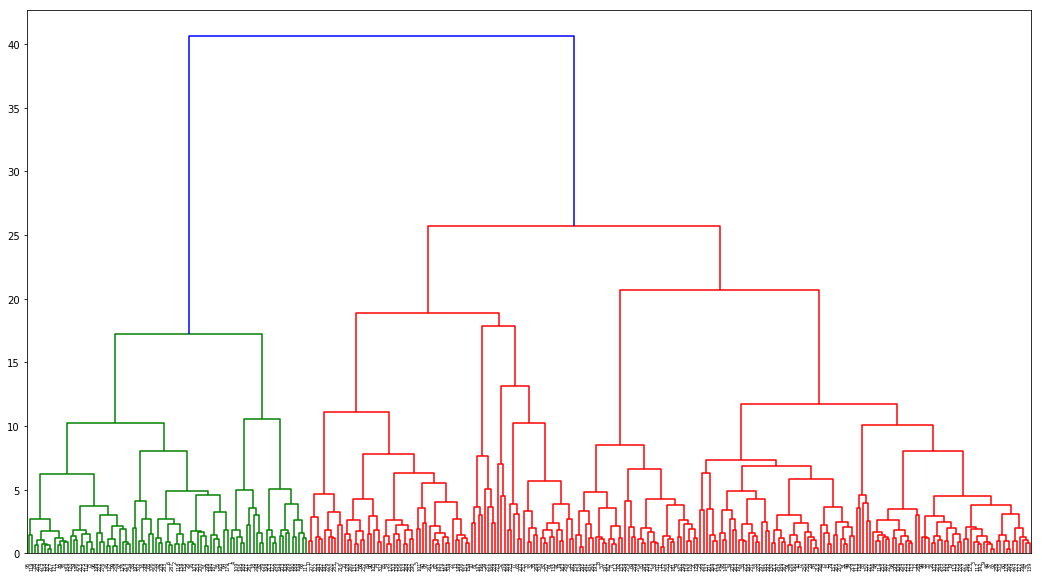

In [12]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize = (18, 10))
row_clusters = linkage(pdist(X_train_pca, metric = "euclidean"), method = "ward")
row_dender = dendrogram(row_clusters, labels = None)
plt.show()

#### 11. 【課題】k-meansにおけるkの値の検討

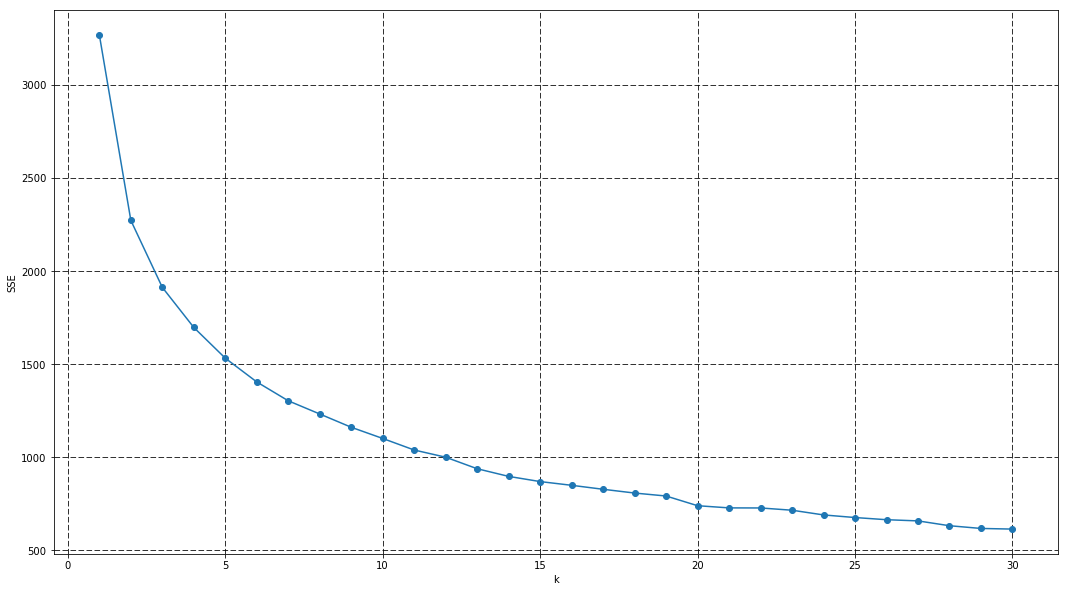

In [13]:
# エルボー法で検討
from sklearn.cluster import KMeans
SSE = []
for i in range(1, 31):
    km = KMeans(n_clusters = i, init = "random", n_init = 30, max_iter = 300, tol = 1e-04, random_state = 0)
    km.fit(X_train_pca)
    SSE.append(km.inertia_)
    
plt.figure(figsize = (18, 10))
plt.grid(color = "black", linestyle = "--")
plt.plot(range(1, 31), SSE, marker = "o")
plt.xlabel("k")
plt.ylabel("SSE")
plt.show()

k = 5  
理由:  
5のあたりでカーブが横向きから縦向きに変わっているため

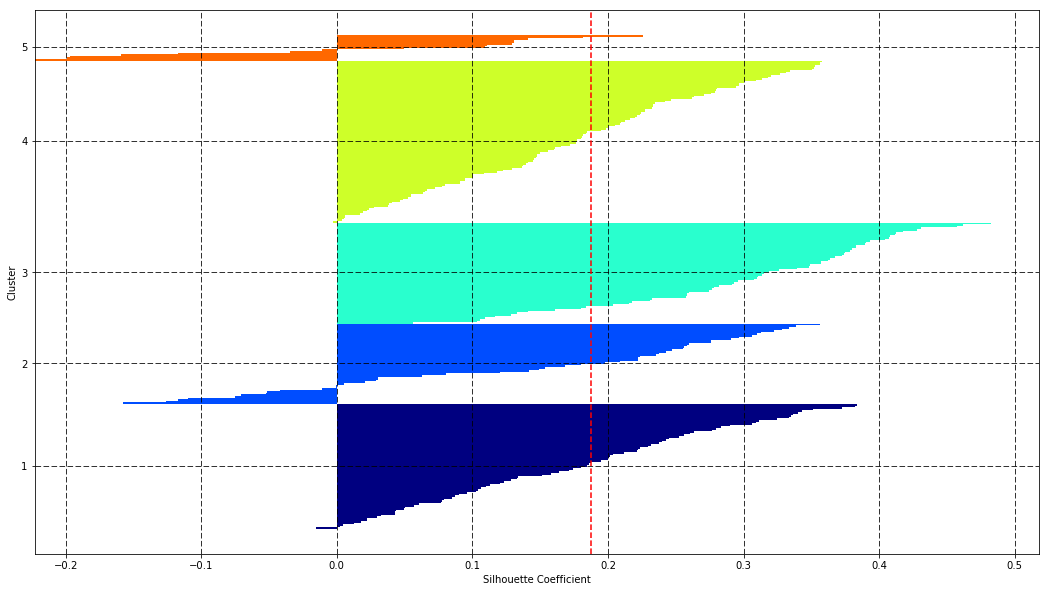

In [14]:
# シルエット図で検討
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters = 5, init = "random", n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(X_train_pca)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_train_pca, y_km, metric = "euclidean")
y_ax_lower, y_ax_upper = 0, 0
yticks = []
plt.figure(figsize = (18, 10))
plt.grid(color = "black", linestyle = "--")
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0, edgecolor = "none", color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = "red", linestyle = "--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel("Cluster")
plt.xlabel("Silhouette Coefficient")
plt.show()

#### 12. 【課題】k-meansの実行

In [15]:
# クラスタ数「5」で実行
km = KMeans(n_clusters = 5, init = "random", n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(X_train_pca)
print(y_km)

[1 1 2 3 1 3 2 1 2 3 3 0 0 3 3 3 2 2 1 3 0 0 3 3 4 4 3 0 1 3 0 3 0 3 3 3 2
 3 0 0 0 3 2 3 3 2 3 0 0 2 2 2 1 0 0 2 3 3 0 1 3 3 2 4 2 2 1 3 1 0 4 0 3 3
 1 2 2 4 3 3 0 4 1 3 3 0 2 3 2 1 1 3 3 0 3 2 1 1 0 2 3 3 3 0 1 1 0 2 1 1 1
 1 0 3 0 3 0 0 2 2 1 1 1 0 0 0 2 2 3 0 3 1 0 0 2 3 2 3 3 0 2 0 3 3 3 1 2 4
 3 3 3 3 1 0 3 2 1 3 2 0 0 3 0 3 3 2 4 0 1 3 0 2 1 0 3 3 0 3 0 2 1 0 2 3 2
 3 0 2 2 3 3 2 3 2 1 0 4 2 1 1 2 3 4 1 0 3 3 1 2 4 3 3 3 1 2 1 1 2 3 3 3 0
 2 3 3 3 3 0 4 1 3 0 0 0 2 0 3 0 3 1 0 0 4 1 3 0 0 3 1 1 3 4 3 2 0 0 2 3 2
 0 0 3 2 3 0 3 3 3 0 3 2 3 3 4 2 1 2 3 0 0 0 1 1 2 0 2 4 2 0 1 0 2 3 0 0 0
 0 3 2 2 3 0 2 0 3 0 2 1]


#### 13. 【課題】クラスタリングの可視化

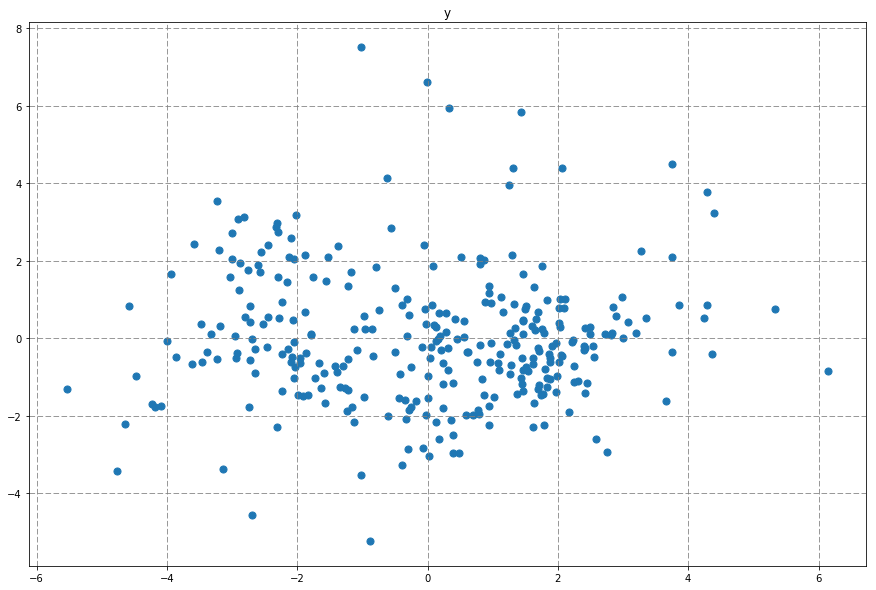

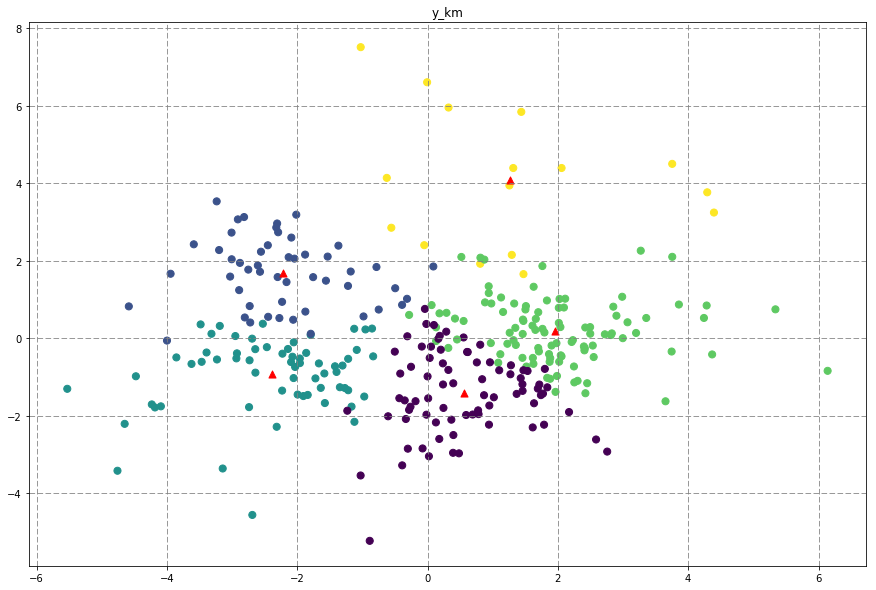

In [16]:
plt.figure(figsize = (15, 10))
plt.title("y")
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = None, marker = "o", s = 50)
plt.grid(color = "gray", linestyle = "--")

plt.figure(figsize = (15, 10))
plt.title("y_km")
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],c = y_km, marker = "o", s = 50)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker = "^", s = 50, color = "red")
plt.grid(color = "gray", linestyle = "--")
plt.show()

#### 14. 【課題】既知のグループとの比較

In [17]:
data_original.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [18]:
data_or = data_original.groupby(["Channel", "Region"], as_index = False).mean()
data_or = data_or.astype({"Channel": str, "Region": str})
data_or["ChgReg"] = data_or["Channel"] + data_or["Region"]
data_or["ChgReg"] = data_or["ChgReg"].replace("11", "Horeca - Lisbon").replace("12", "Horeca - Oporto")\
                                     .replace("13", "Horeca - Others").replace("21", "Retail - Lisbon")\
                                     .replace("22", "Retail - Oporto").replace("23", "Retail - Others")
data_or.head(6)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,ChgReg
0,1,1,12902.254237,3870.203390,4026.135593,3127.322034,950.525424,1197.152542,Horeca - Lisbon
1,1,2,11650.535714,2304.250000,4395.500000,5745.035714,482.714286,1105.892857,Horeca - Oporto
2,1,3,13878.052133,3486.981043,3886.734597,3656.900474,786.682464,1518.284360,Horeca - Others
3,2,1,5200.000000,10784.000000,18471.944444,2584.111111,8225.277778,1871.944444,Retail - Lisbon
4,2,2,7289.789474,9190.789474,16326.315789,1540.578947,8410.263158,1239.000000,Retail - Oporto
5,2,3,9831.504762,10981.009524,15953.809524,1513.200000,6899.238095,1826.209524,Retail - Others


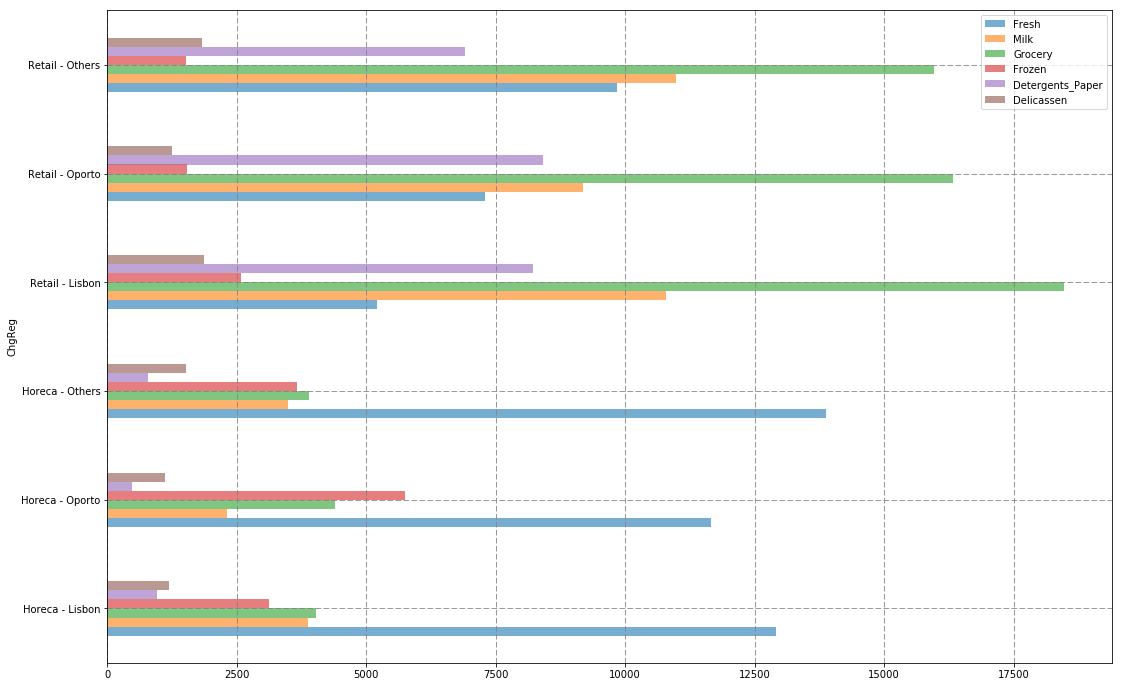

In [19]:
data_or.index = data_or["ChgReg"]
data_or.plot.barh(alpha = 0.6, figsize=(18, 12))
plt.grid(color = "gray", linestyle = "--")
# plt.ylabel(data_or["ChgReg"])

答え:  
既知のグループはホテル/レストラン/カフェ(horeca)あるいは小売店で分ける「Channel」とリスボン、オルト、その他といった地域ごとに分ける「Region」を分類のキーにしている。  
これらのキーを利用し、２Channel掛ける３Regionの６っつのデータにわけ、かつ、各キー内の商品ごとに平均値をとって比較して見た。
結果として、Channelだけであれば、分類に使えそうだが、Regionは分類に使えそうにないと感じられた。  
例えば、Channelだけで比較すると小売店ではGrocery、ついでMilkが主流であるのに対し、HorecaではFreshが主流であるとの判断ができた。  
しかし、Region間では地域差はあまり見られなかった。
したがって、Channelとしてのみ区別ができるような状態のデータであると推測できる。

#### 15. 【課題】卸売業者への報告
答え:  
今回の顧客データのグループ分けにおいては、元のデータにある「Channel」と「Region」を使うのではなく、各商品のデータを織り交ぜて分析して得られた五つのグループに分類することを提案致します。  
ChannelやRegionといった情報だけでは区別できない、商品同士の関連性も今回の分析の手法とし取り入れた結果、最適な分類数を５と結論づけました。